In [1]:
import numpy as np
import pandas as pd
import math
import trackpy as tp
import matplotlib.pyplot as plt
%matplotlib inline)

In [22]:
t=pd.read_csv("C:/Users/**.csv") # uploading a file with the coordinates of tracked particles

In [23]:
t.head()

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,0,11.217195,314.937673,2498.613690,3.742028,0.116985,41.576698,42433.0,0.029415,0,0
1,95,440.046361,697.799641,2029.599355,5.595933,0.299296,24.800136,37197.0,0.033615,0,1
2,96,440.334310,32.916117,2986.957542,3.097894,0.057821,78.412194,34063.0,0.036755,0,2
3,97,440.738412,334.327673,2384.095415,3.412984,0.054129,42.670822,32500.0,0.038552,0,3
4,98,444.914823,142.188083,2736.038520,3.087069,0.085347,71.118037,33655.0,0.037208,0,4


In [24]:
t1 = tp.filter_stubs(t, 50)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 15463
After: 404


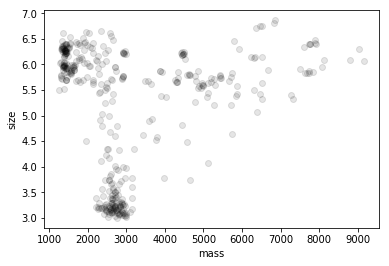

In [25]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [26]:
t1.head()

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,,
0,0,11.217195,314.937673,2498.613690,3.742028,0.116985,41.576698,42433.0,0.029415,0,0
0,96,440.334310,32.916117,2986.957542,3.097894,0.057821,78.412194,34063.0,0.036755,0,2
0,97,440.738412,334.327673,2384.095415,3.412984,0.054129,42.670822,32500.0,0.038552,0,3
0,98,444.914823,142.188083,2736.038520,3.087069,0.085347,71.118037,33655.0,0.037208,0,4
0,99,452.189759,421.861448,2613.861380,3.014013,0.038525,70.388621,33427.0,0.037466,0,5


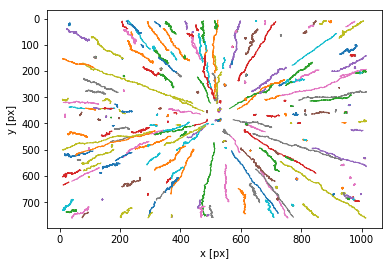

In [27]:
plt.figure()
tp.plot_traj(t1);

In [28]:
par = []
for i in t1['particle'].unique():
    c=float(t1[(t1["particle"]==i) & (t1["frame"]==t1[t1["particle"]==i].frame.max())].x)-float(t1[(t1["particle"]==i) & (t1["frame"]==t1[t1["particle"]==i].frame.min())].x)
    d=float(t1[(t1["particle"]==i) & (t1["frame"]==t1[t1["particle"]==i].frame.max())].y)-float(t1[(t1["particle"]==i) & (t1["frame"]==t1[t1["particle"]==i].frame.min())].y)
    dist = math.sqrt(c**2+d**2)
    #filtering out particles travelled for a very short distance
    if dist>120:   
        par.append(i)

In [29]:
for i in par:
    mxframe= t1[t1["particle"]==i].frame.max()
    mnframe= t1[t1["particle"]==i].frame.min()
    print(i, mnframe, mxframe) 

9 0 637
13 0 1199
33 0 821
38 0 433
43 0 1199
49 0 677
51 0 1199
59 0 1199
64 0 1199
66 0 768
85 0 1199
89 0 1199
103 0 1199
125 0 1199
131 0 1199
135 0 855
434 21 317
757 45 1199
1138 77 1199
1553 108 550
2369 169 1199
2575 184 886
3597 266 1199
3611 267 946
3987 297 916
4782 364 1199
5282 404 1053
5306 407 673
5776 443 1146
6812 521 1070
6832 523 1199
9600 744 1199
10168 785 1199
10405 803 1123
10657 819 1199


In [30]:
limdis = [40, 50, 60 , 70, 80, 90, 100, 110, 120]
alw = 0.03
frm = []
parf = []
rdis = []
for a in limdis:
    for i in range((t1['frame'].max()+1)):
        partemp = []
        for j in par:
            for k in t1[t1['particle']==j]['frame'].unique():
                if ((k==i)): # & (t1[t1['particle']==j]['frame'].min()>k)
                    partemp.append(j)
                    break # assigning the particles in par that are in the frame that is being iterated
        partemp1 = []
        for l in partemp:
            cx = (float(t1[(t1["particle"]==l) & (t1["frame"]==i)].x)-512.00)/3.16
            dx = (float(t1[(t1["particle"]==l) & (t1["frame"]==i)].y)-384.00)/3.16
            dist = math.sqrt(cx**2+dx**2)
            if a-alw<dist<a+alw:  
                partemp1.append(l)
        #print(partemp1,i)
        if partemp1:
            frm.append(i)
            parf.append(partemp1)
            rdis.append(a)
dict = {'Frame':frm, 'Particles':parf, 'Radial_distance': rdis}
df = pd.DataFrame(dict)

In [31]:
df[df['Frame']==0]

,Frame,Particles,Radial_distance


In [118]:
df=df[df['Frame']!=0] #Dropping particles at the the very first frame for a certain radial distance


In [ ]:
#uses the frame right before the frame of interest
velt = []
for m, n in zip(df['Particles'], df['Frame']):
    flag = []
    for k in t1[t1['particle']==m[0]]['frame'].unique():
        flag.append((k-n))
            #a = t1[(t1['particle']==m[0]) & (t1['frame']==(n))].x
    sd = {'lis':t1[t1['particle']==m[0]]['frame'].unique(), 'flag':flag}
    df1 = pd.DataFrame(sd)
    df1.drop([flag.index(0)])
    prevfrm = df1[df1['lis']<n].max()[0]
    if np.isnan(prevfrm):
        velt.append(0)
        continue
    cx = (float(t1[(t1["particle"]==m[0]) & (t1["frame"]==n)].x) - float(t1[(t1["particle"]==(m[0])) & (t1["frame"]==(prevfrm))].x))/3
    dx = (float(t1[(t1["particle"]==m[0]) & (t1["frame"]==n)].y) - float(t1[(t1["particle"]==(m[0])) & (t1["frame"]==(prevfrm))].y))/3 
    vel = (math.sqrt(cx**2+dx**2))*20/(n-prevfrm)
    velt.append(vel)
            #break
    print(m[0], n, prevfrm, vel)

In [13]:
#uses delt.
velt = []
fps=20
delt=0.5
for m, n in zip(df['Particles'], df['Frame']):
    prevfrm = n - delt*fps
    if (prevfrm<0 or len(np.array(t1[(t1["particle"]==m[0]) & (t1["frame"]==prevfrm)].x))==0):
        velt.append(0)
        continue
    cx = (float(t1[(t1["particle"]==m[0]) & (t1["frame"]==n)].x) - float(t1[(t1["particle"]==(m[0])) & (t1["frame"]==(prevfrm))].x))/3
    dx = (float(t1[(t1["particle"]==m[0]) & (t1["frame"]==n)].y) - float(t1[(t1["particle"]==(m[0])) & (t1["frame"]==(prevfrm))].y))/3 
    vel = (math.sqrt(cx**2+dx**2))*fps/(n-prevfrm)
    velt.append(vel)
            #break
    print(m[0], n, prevfrm, vel)

41 744 734.0 2.5177169653176317
41 758 748.0 1.3008165847999917
41 765 755.0 2.1524963294263384
36 972 962.0 3.6086726657926773
77 1009 999.0 1.3456812753236382
65 411 401.0 2.5149743808882947
65 412 402.0 1.5114068698789902
246 576 566.0 2.5210721174931137
41 654 644.0 1.436355210999574
77 769 759.0 1.9248133761806234
36 884 874.0 2.1243668217915688
36 889 879.0 0.9357654476281827
56 155 145.0 2.5115571920831026
6164 473 463.0 1.088823328802357
56 14 4.0 0.5533754092726748
56 20 10.0 0.2800044878409556
77 180 170.0 0.902437770626712
58 352 342.0 6.130149004208182
41 477 467.0 1.7705899339361284
65 110 100.0 3.9232373968448706
58 283 273.0 2.312734693802287
36 533 523.0 2.7523060106779664
11875 943 933.0 1.3716633855856826
80 998 988.0 1.8660308063027276
80 1000 990.0 1.5410436128263565
80 1001 991.0 0.9965398885928598
80 1003 993.0 0.7068950696332089
80 1005 995.0 0.5632337843426206
80 1006 996.0 0.827659462246635
80 1008 998.0 0.6135127447558145
80 1010 1000.0 1.0875772732642928
80 1

In [14]:
df['Velocity'] = velt

In [15]:
df[df['Velocity']==0]

,Frame,Particles,Radial_distance,Velocity
14,2,[56],70,0.0
19,382,[6164],70,0.0
38,6,[65],90,0.0
58,6,[61],120,0.0


In [16]:
df = df[df['Velocity']!=0]

In [17]:
df.to_csv('C:/Users/**.csv') # writting the calculated velocity on a csv file

In [150]:
df = pd.read_csv('C:/Users/**.csv')
limdis = [40, 50, 60 , 70, 80, 85, 90, 100, 110, 120]

In [18]:
for rd in limdis:
    a = df[df['Radial_distance']==rd]['Velocity'].mean(), np.std(df[df['Radial_distance']==rd]['Velocity'])
    print(a)

(2.1850767641320554, 0.8514501900615923)
(1.8526791749800497, 0.5470602994190003)
(1.8001902604427298, 0.7113669316403728)
(1.9273113211769304, 2.160559727057744)
(1.5311087125185983, 0.8387399344712905)
(2.9909000246748065, 0.6882266013978998)
(2.1737178334302327, 0.8001293262134103)
(3.305981745128932, 0.29341708496164)
(1.2926995721874748, 0.0)


In [19]:
y = []
yerr = []
xerr = []
for rd in limdis:
    y.append(df[df['Radial_distance']==rd]['Velocity'].mean()) 
    yerr.append(np.std(df[df['Radial_distance']==rd]['Velocity']))
    xerr.append(2)

<ErrorbarContainer object of 3 artists>

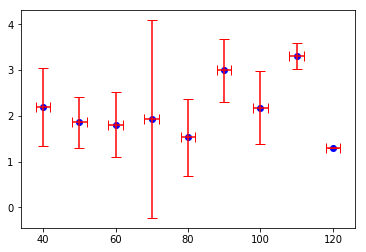

In [20]:
 plt.errorbar(limdis,y, yerr = yerr, xerr=xerr,fmt = 'o', color = 'b', ecolor='r', capsize = 5, barsabove=True)